In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# from kmodes import kmodes
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [4]:
df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [5]:
df.isnull().sum().apply(lambda x: (x/len(df))*100)

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [6]:
df1 = df.drop(columns = ['stem-root', 'stem-surface', 'veil-type','veil-color','spore-print-color'])

In [7]:
df1.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a


In [8]:
categorical_features = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']
continuous_features = ['cap-diameter','stem-height','stem-width']



C:\Users\Richard\AppData\Local\Temp\ipykernel_3320\3153737193.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


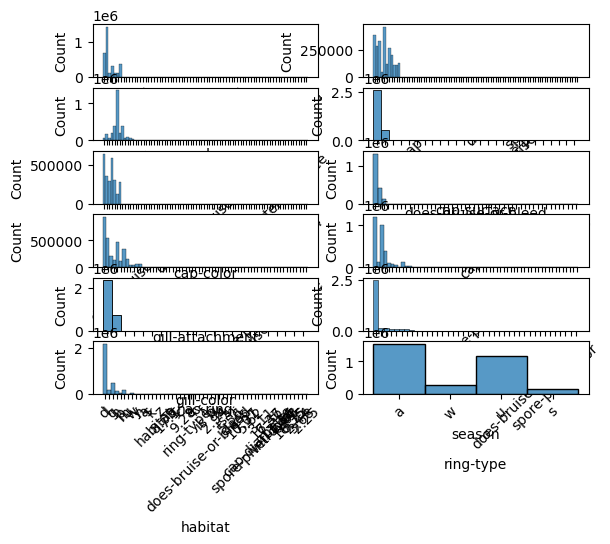

In [9]:
plt.figure()
for i,n in enumerate(['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']):
    plt.subplot(6,2,i+1)
    sns.histplot(df1, x = n)
    plt.xticks(rotation = 45)
plt.tight_layout()

In [10]:
dict1 = {}
for n in ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']:
    dict1[n] = df1[n].value_counts().to_dict()

In [11]:
for n in ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']:
    df1['out_'+n] = df1[n].apply(lambda x : 0 if pd.isna(x) else 1 if type(x)!= str else 1 if len(x)>1 else 1 if x in ['0','1','2','3','4','5','6','7','8','9'] else 0)

In [12]:
df1['out_sum'] = df1[[n for n in df1.columns if 'out_' in n]].sum(axis = 1)

In [13]:
for n in ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']:
    df1[n] = df1[n].apply(lambda x : x if pd.isna(x) else np.nan if type(x)!= str else np.nan if len(x)>1 else np.nan if x in ['0','1','2','3','4','5','6','7','8','9'] else x)

In [14]:
df2 = df1[df1.columns[:17]]

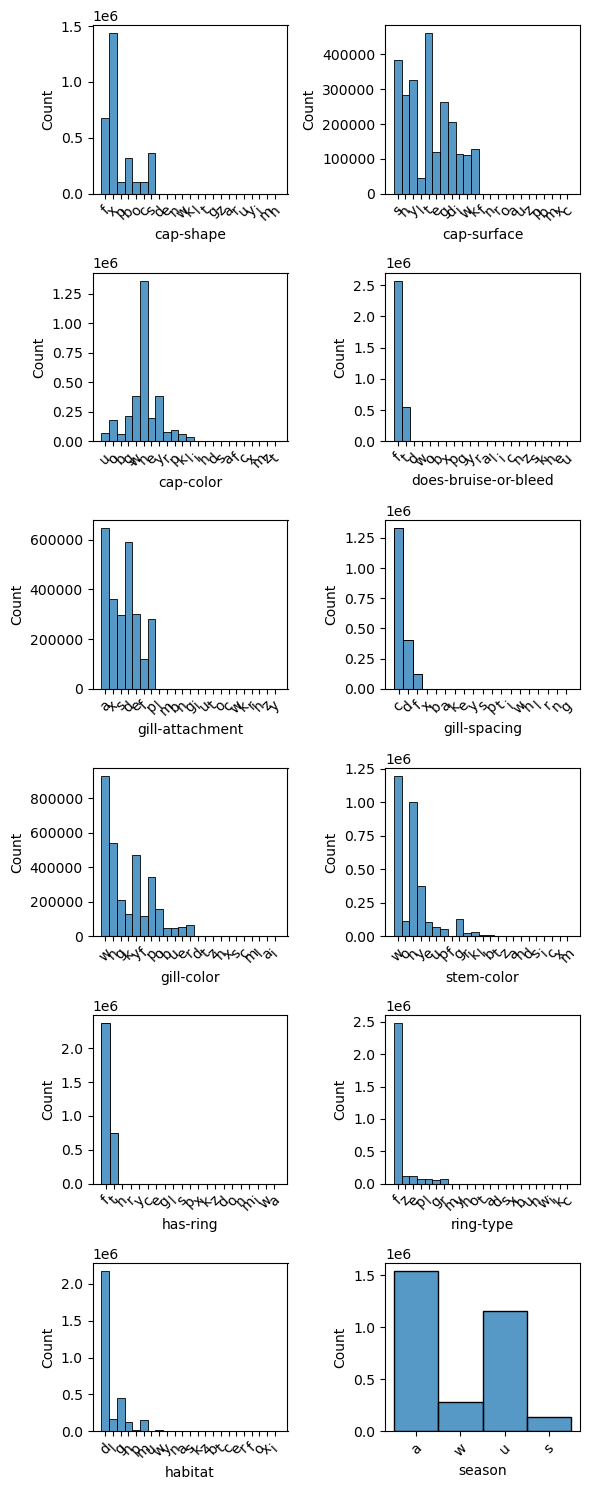

In [15]:
plt.figure(figsize = (6,15))
for i,n in enumerate(['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']):
    plt.subplot(6,2,i+1)
    sns.histplot(df2, x = n)
    plt.xticks(rotation = 45)
plt.tight_layout()

In [16]:
major_minor = {}
for i,n in enumerate(['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','habitat']):
    vc = df2[n].value_counts()
    length = len(df2[n])
    major_minor[n] =  {'major':[key for key in vc.keys() if vc[key] > 0.3*length], 'minor': [key for key in vc.keys() if vc[key] <= 0.3*length and  vc[key] >= 0.05*length]}

l2 =  len(df2[df2['has-ring'] != 'f'])
ringvc = df2[df2['has-ring'] != 'f']['ring-type'].value_counts()
major_minor['ring-type'] = {'major':[key for key in ringvc.keys() if ringvc[key] > 0.3*l2], 'minor': [key for key in ringvc.keys() if ringvc[key] <= 0.3*l2 and  ringvc[key] >= 0.05*l2]}

In [17]:
major_minor

{'cap-shape': {'major': ['x'], 'minor': ['f', 's', 'b']},
 'cap-surface': {'major': [], 'minor': ['t', 's', 'y', 'h', 'g', 'd']},
 'cap-color': {'major': ['n'], 'minor': ['y', 'w', 'g', 'e', 'o']},
 'does-bruise-or-bleed': {'major': ['f'], 'minor': ['t']},
 'gill-attachment': {'major': [], 'minor': ['a', 'd', 'x', 'e', 's', 'p']},
 'gill-spacing': {'major': ['c'], 'minor': ['d']},
 'gill-color': {'major': [], 'minor': ['w', 'n', 'y', 'p', 'g', 'o']},
 'stem-color': {'major': ['w', 'n'], 'minor': ['y']},
 'habitat': {'major': ['d'], 'minor': ['g', 'l']},
 'ring-type': {'major': [], 'minor': ['e', 'z', 'f', 'l', 'r', 'p', 'g']}}

In [18]:
df4 = df2.copy()
mask_cols = ['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','ring-type','habitat']
for n in mask_cols:
    df4[n] = df4[n].map(lambda x: x if x in major_minor[n]['major'] or x in major_minor[n]['minor'] else 'other')
df4['has-ring'] = df4['has-ring'].apply(lambda x: x if x in ['f','t'] else 'other')
df4.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,other,f,a,c,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,other,t,z,d,w
2,2,e,6.94,f,s,other,f,x,c,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,other,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,other,w,f,d,other,w,3.37,8.36,w,f,f,g,a


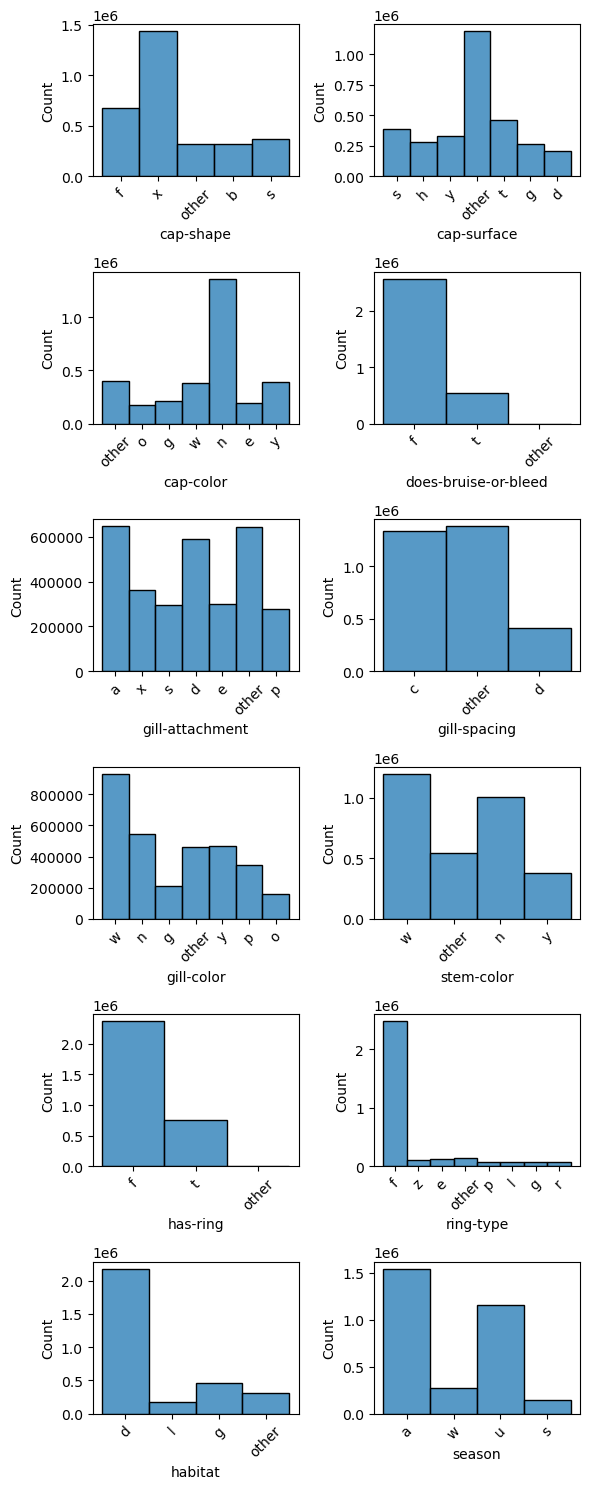

In [19]:
plt.figure(figsize = (6,15))
for i,n in enumerate(['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-color','has-ring','ring-type','habitat','season']):
    plt.subplot(6,2,i+1)
    sns.histplot(df4, x = n)
    plt.xticks(rotation = 45)
plt.tight_layout()

In [20]:
# clist = categorical_features
# plt.figure(figsize = (32,100))
# m = 1
# for i in range(len(clist)):
#     for n in range(i+1,len(clist)):
#         plt.subplot(16,5,m)
#         df_temp = pd.pivot_table(df4[[clist[i], clist[n],'id']],values = 'id' ,index = clist[i], columns = clist[n],aggfunc = 'count',fill_value = 0)
#         df1_temp = df_temp.div(df_temp.sum(axis=1), axis=0)*100
#         sns.heatmap(df1_temp, annot = df_temp,fmt = 'd', cmap='YlGn', vmin = 0, cbar = False)
#         plt.xlabel(clist[n])
#         plt.ylabel(clist[i])
#         plt.title(f'{clist[i]} & {clist[n]}')
#         m+=1
# plt.suptitle("Relations")
# plt.tight_layout(rect = [0,0,1,0.96])
# plt.savefig('relations.png', bbox_inches='tight')
    

In [21]:

# plt.figure(figsize = (40,32))
# for i, n in enumerate(categorical_features):
#     plt.subplot(3,4,i+1)
#     df_temp = pd.pivot_table(df4[[n, 'class','id']],values = 'id' ,index = n, columns = 'class',aggfunc = 'count',fill_value = 0)
#     df1_temp = df_temp.div(df_temp.sum(axis=1), axis=0)*100
#     sns.heatmap(df1_temp, annot = df_temp,fmt = 'd', cmap='YlGn', vmin = 0, cbar = False)
#     plt.xlabel('class')
#     plt.ylabel(n)
#     plt.title(f'class & {n}')
#     m+=1
# plt.suptitle("Relations")
# plt.tight_layout(rect = [0,0,1,0.96])
# plt.savefig('relations.png', bbox_inches='tight')
    

In [22]:
df4.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

Binning continuous variables

In [25]:
cont = ['cap-diameter', 'stem-height', 'stem-width']


for n in cont:
    minimum =  min(df2[n])
    maximum = max(df2[n]) 
    bin_size = (maximum  - minimum)/20
    df2[f'{n}_bin'] = df2[n].apply(lambda x: round((x-minimum)/bin_size) if not pd.isna(x) else x)

C:\Users\Richard\AppData\Local\Temp\ipykernel_3320\2441271663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{n}_bin'] = df2[n].apply(lambda x: round((x-minimum)/bin_size) if not pd.isna(x) else x)
C:\Users\Richard\AppData\Local\Temp\ipykernel_3320\2441271663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'{n}_bin'] = df2[n].apply(lambda x: round((x-minimum)/bin_size) if not pd.isna(x) else x)
C:\Users\Richard\AppData\Local\Temp\ipykernel_3320\2441271663.py:8: SettingWithCopyWarning: 
A

Label Encode variables before chi2 test

In [26]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

features_check = ['cap-shape', 'cap-surface', 'cap-color',  'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'ring-type', 'habitat','cap-diameter_bin', 'stem-height_bin', 'stem-width_bin']
X = df2.drop(columns = cont+['has-ring','class','id'])
y = df2['class']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(lambda col: le.fit_transform(col))
y = le.fit_transform(y)

chi_stats, p_values = chi2(X,y)

# chi_test = SelectKBest(score_func = chi2, k =5)
# fit = chi_test.fit(X,y)
# fit.scores_

In [27]:
chi_stats

array([1.06821812e+05, 4.33783520e+04, 1.08020990e+04, 1.11136555e+04,
       6.46727875e+01, 2.68661599e+04, 1.36179349e+04, 1.95605221e+04,
       1.80206299e+04, 1.85924965e+03, 1.45726125e+04, 7.01964529e+04,
       1.13310728e+03, 1.09369907e+05])

In [28]:
p_values

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       8.84277060e-016, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.10524912e-248, 0.00000000e+000])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'stem-width_bin'),
  Text(1, 0, 'cap-shape'),
  Text(2, 0, 'cap-diameter_bin'),
  Text(3, 0, 'cap-surface'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'stem-color'),
  Text(6, 0, 'ring-type'),
  Text(7, 0, 'season'),
  Text(8, 0, 'gill-color'),
  Text(9, 0, 'does-bruise-or-bleed'),
  Text(10, 0, 'cap-color'),
  Text(11, 0, 'habitat'),
  Text(12, 0, 'stem-height_bin'),
  Text(13, 0, 'gill-attachment')])

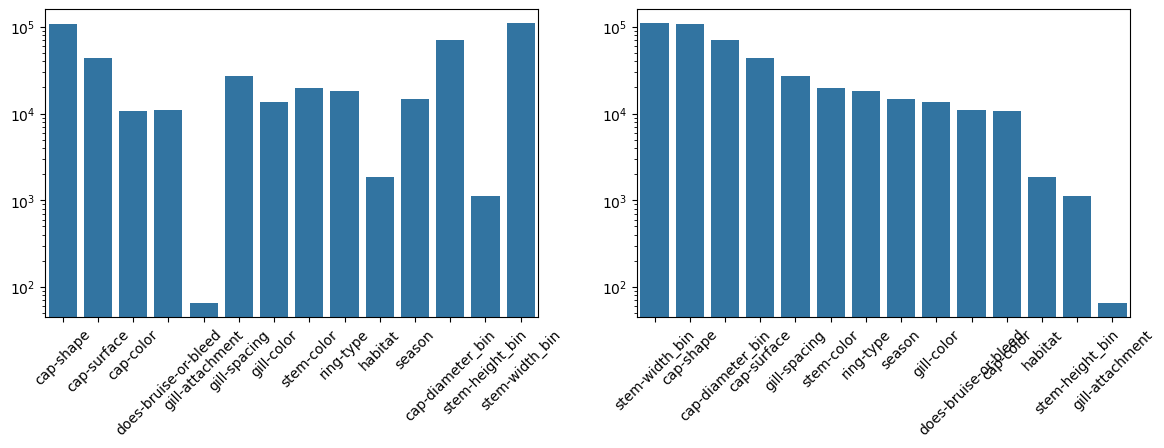

In [29]:
plt.figure(figsize = (14, 4))
xnames = list(df2.columns)
plt.subplot(1,2,1)
for n in cont+['has-ring','class','id']:
    xnames.remove(n)
xnames_s = sorted(xnames, key = lambda x: chi_stats[xnames.index(x)], reverse= True)
chi_stats_s = sorted(chi_stats, reverse=True)
sns.barplot(x = xnames, y = chi_stats)
plt.yscale("log")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)

sns.barplot(x = xnames_s, y = chi_stats_s)
plt.yscale("log")
plt.xticks(rotation = 45)

In [30]:
df4.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')

Naive modelling with all features

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 

lr_model = LogisticRegression()
oh_encoder = OneHotEncoder(sparse_output= False)

df4_cat = df4[['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type','habitat', 'season']]
df4_cat  = pd.DataFrame(oh_encoder.fit_transform(df4_cat))
df4_cat.columns = oh_encoder.get_feature_names_out()

df4_cat.head()
    

,cap-shape_b,cap-shape_f,cap-shape_other,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_g,cap-surface_h,cap-surface_other,cap-surface_s,...,ring-type_r,ring-type_z,habitat_d,habitat_g,habitat_l,habitat_other,season_a,season_s,season_u,season_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
df4_enc = pd.concat([df4_cat, df4.drop(columns = ['id','cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type','habitat', 'season'])], axis = 1)

In [40]:
df4_enc.dropna(inplace=True)

In [34]:
df4_enc['class'] = le.fit_transform(df4_enc['class'])

In [39]:
df4_enc.isnull().sum().sum()

4

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df4_enc.drop(columns = ['class'])
y = df4_enc['class']

X_train, y_train, X_test, y_test = train_test_split(X,y, test_size=0.2)

lr_model.fit(X_train, y_train)
preds = lr_model.predict(y_test)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

MemoryError: Unable to allocate 1.21 GiB for an array with shape (2493552, 65) and data type float64

Use Cramer's V for checking correlation between variables

In [ ]:
from scipy.stats import chi2_contingency

def cramers_V(df):
    feats = df.columns
    num_features = len(df.columns)
    V_mat = np.zeros((num_features, num_features))
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if i != j:
                contingency_table = pd.crosstab(df[feats[i]], df[feats[j]])
                chi_stat, _, _, _  = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                r = contingency_table.shape[0]
                c = contingency_table.shape[1]
                V_mat[i][j] = (chi_stat/(n*min(c-1,r-1)))**0.5
            else:
                V_mat[i][j] = 1
    
    return V_mat


<Axes: >

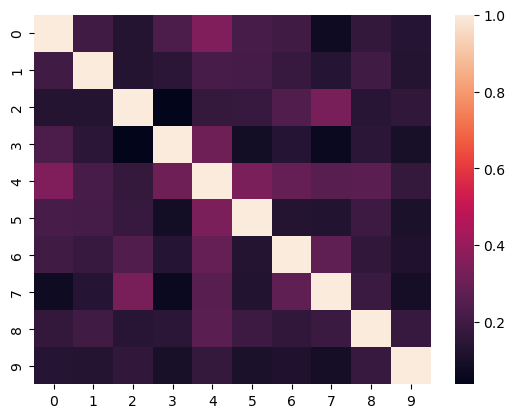

In [ ]:
cramers_corr = cramers_V(X)


<Axes: >

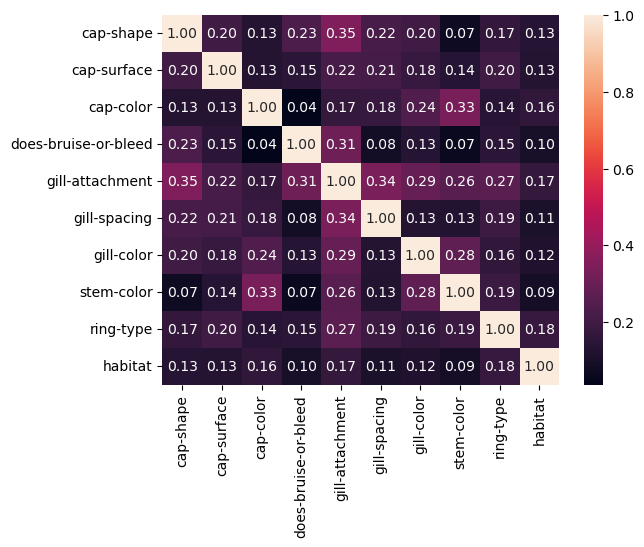

In [ ]:
cramers_corr_df = pd.DataFrame(cramers_corr, columns= features_check, index=  features_check)
sns.heatmap(cramers_corr_df, annot= True, fmt= '.2f')
# plt.xticks(range(0.5,len(X.columns)+1),X.columns, rotation = 45)
# plt.yticks(range(0.5,len(X.columns)+1),X.columns, rotation = 45)

In [ ]:
cramers_corr_df

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,ring-type,habitat
0,1.000000,0.203060,0.131649,0.231514,0.348400,0.218721,0.199856,0.073370,0.165878,0.134607
1,0.203060,1.000000,0.130510,0.150446,0.220173,0.211167,0.179640,0.135207,0.201158,0.128858
2,0.131649,0.130510,1.000000,0.037781,0.169515,0.178674,0.239716,0.333753,0.140369,0.163712
3,0.231514,0.150446,0.037781,1.000000,0.306389,0.083080,0.134809,0.066153,0.149876,0.101580
4,0.348400,0.220173,0.169515,0.306389,1.000000,0.335887,0.291647,0.256789,0.267045,0.172859
5,0.218721,0.211167,0.178674,0.083080,0.335887,1.000000,0.130720,0.125138,0.194081,0.108792
6,0.199856,0.179640,0.239716,0.134809,0.291647,0.130720,1.000000,0.277624,0.163573,0.118455
7,0.073370,0.135207,0.333753,0.066153,0.256789,0.125138,0.277624,1.000000,0.187360,0.092124
8,0.165878,0.201158,0.140369,0.149876,0.267045,0.194081,0.163573,0.187360,1.000000,0.177587
9,0.134607,0.128858,0.163712,0.101580,0.172859,0.108792,0.118455,0.092124,0.177587,1.000000
